In [103]:
import chardet


In [104]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from sqlalchemy import create_engine

# import dateutil.parser
from dateutil.parser import parse
# from dateutil.parser import parse
import re
# from ast import literal_eval
import ast

In [105]:
def winsorize(df, column, lower_quantile=0.05, upper_quantile=0.95):
    """Applying winsorization to remove outliers by converting them into less extreme values.
    Clip method limits the values in the 'price' to lower and upper limits. 
    Values below the 5th and above 95th percentiles are replaced by the 5th/95th percentile values accordingly. 
    This does not remove the values, rather caps them at certain points. """
    lower_limit = round(df[column].quantile(lower_quantile))
    upper_limit = round(df[column].quantile(upper_quantile))
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df

In [106]:
def outliers_numerical_cols(df):
    """Plot boxplots for all numerical columns in the dataframe to visualize outliers."""
    
    # Select columns with numerical data types (float64 and int64)
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    num_cols = 3  # We want 3 columns in our grid of plots
    num_rows = len(numerical_columns) // num_cols
    num_rows += len(numerical_columns) % num_cols  # Add an extra row if needed

    plt.figure(figsize=(15, 5 * num_rows))

    # Plot boxplots for each numerical column
    for i, col in enumerate(numerical_columns, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.boxplot(x=df[col].dropna())  # dropping NA values for plotting
        plt.title(col)

    plt.tight_layout()
    plt.show()

In [107]:
def distribution_numerical_cols(df):
    
    # Select columns with numerical data types (float64 and int64)
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    num_cols = 3  # We want 3 columns in our grid of plots
    num_rows = len(numerical_columns) // num_cols
    num_rows += len(numerical_columns) % num_cols  # Add an extra row if needed

    plt.figure(figsize=(15, 5 * num_rows))

    # Plot boxplots for each numerical column
    for i, col in enumerate(numerical_columns, start=1):
        plt.subplot(num_rows, num_cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [108]:
def distribution_numerical_cols(df):
    # Select columns with numerical data types (float64 and int64)
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    num_cols = 3  # We want 3 columns in our grid of plots
    num_rows = len(numerical_columns) // num_cols
    num_rows += len(numerical_columns) % num_cols  # Add an extra row if needed

    plt.figure(figsize=(15, 5 * num_rows))

    # Plot boxplots for each numerical column
    for i, col in enumerate(numerical_columns, start=1):
        try:
            plt.subplot(num_rows, num_cols, i)
            sns.histplot(df[col], bins=30, kde=False)
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
        except:
            return None

    plt.tight_layout()
    plt.show()

In [109]:
# Function to check if a column has outliers
def outlier_cols(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((column_data < lower_bound) | (column_data > upper_bound)).any()

In [110]:
"""Import and load the data into a dataframe."""
data = pd.read_csv("cleaned_best_books_ever.csv")
df = pd.DataFrame(data)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52424 entries, 0 to 52423
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bookId             52424 non-null  int64  
 1   title              52424 non-null  object 
 2   series             23439 non-null  object 
 3   author             30406 non-null  object 
 4   rating             52424 non-null  float64
 5   description        51088 non-null  object 
 6   language           48623 non-null  object 
 7   isbn               52424 non-null  int64  
 8   genres             52424 non-null  object 
 9   characters         52424 non-null  object 
 10  bookFormat         52424 non-null  object 
 11  edition            52424 non-null  object 
 12  pages              50081 non-null  object 
 13  publisher          48732 non-null  object 
 14  awards             52424 non-null  object 
 15  numRatings         52424 non-null  int64  
 16  likedPercent       518

In [112]:
"""Mapping for column names and types"""
columns_dict = {
                'title': 'string',
                'series': 'string',
                'author': 'string',
                'description': 'string',
                'language': 'string',
                # 'genres': 'O',
                # 'characters': 'O',
                'bookFormat': 'string',
                'edition': 'string',
                # 'pages': 'float',
                'publisher': 'string',
                # 'awards': 'O',
                # 'setting': 'O',
                'coverImg': 'string',
                # 'price': 'float',
                'oldestPublishDate': 'datetime64[ns]'
                }

for column, dtype in columns_dict.items():
    try:
        df[column] = df[column].astype(dtype)
    except ValueError:
        print(f'Column {column} dtype change failed!')
        
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['pages'] = pd.to_numeric(df['pages'], errors='coerce').astype('Int64')

In [113]:
df.dtypes

bookId                        int64
title                        string
series                       string
author                       string
rating                      float64
description                  string
language                     string
isbn                          int64
genres                       object
characters                   object
bookFormat                   string
edition                      string
pages                         Int64
publisher                    string
awards                       object
numRatings                    int64
likedPercent                float64
setting                      object
coverImg                     string
bbeScore                      int64
bbeVotes                      int64
price                       float64
oldestPublishDate    datetime64[ns]
num_awards                    int64
num_characters                int64
num_setting                   int64
num_genres                    int64
rating_5_star               

In [114]:
df['bookId'].nunique(), df['isbn'].nunique()

(52424, 43377)

In [115]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object','string']).columns
numerical_cols, categorical_cols

(Index(['bookId', 'rating', 'isbn', 'pages', 'numRatings', 'likedPercent',
        'bbeScore', 'bbeVotes', 'price', 'num_awards', 'num_characters',
        'num_setting', 'num_genres', 'rating_5_star', 'rating_4_star',
        'rating_3_star', 'rating_2_star', 'rating_1_star'],
       dtype='object'),
 Index(['title', 'series', 'author', 'description', 'language', 'genres',
        'characters', 'bookFormat', 'edition', 'publisher', 'awards', 'setting',
        'coverImg'],
       dtype='object'))

In [116]:
"""Check for Nulls, NAs, NANs, and fix them if any"""
print(df.isnull().sum().sum())

78354


In [117]:
print(df.isna().any().sum())

10


In [118]:
# Splitting the 'genres' column by ',' and finding unique values
all_genres = df['genres'].str.split(',', expand=True).stack().str.strip().unique()

len(all_genres), all_genres

(2065,
 array(["['post apocalyptic'", "'teen'", "'dystopia'", ..., "'pulp']",
        "['jazz'", "['folk tales'"], dtype=object))

In [119]:
# Compute descriptive statistics for numerical columns
desc_stats = df[numerical_cols].describe().transpose()

# Compute mode and skewness
desc_stats["mode"] = df[numerical_cols].mode().iloc[0]

desc_stats

,count,mean,std,min,25%,50%,75%,max,mode
bookId,52424.0,10465317.778098,12082003.907809,1.0,372544.0,6441518.0,17675649.75,55726134.0,1.0
rating,52424.0,4.021885,0.367103,0.0,3.82,4.03,4.23,5.0,4.0
isbn,52424.0,9773649453142.816406,619973673444.238281,9770910.0,9780440242137.75,9780989655548.5,9782942900241.25,9999999999999.0,9999999999999.0
pages,50058.0,328.694914,252.261672,0.0,210.0,304.0,392.0,14777.0,320.0
numRatings,52424.0,17893.898901,103997.0627,0.0,341.0,2310.5,9389.5,7048471.0,2.0
likedPercent,51803.0,92.232342,5.988173,0.0,90.0,94.0,96.0,100.0,95.0
bbeScore,52424.0,1985.977358,35171.192267,0.0,84.0,97.0,187.0,2993816.0,100.0
bbeVotes,52424.0,22.552648,369.347883,0.0,1.0,1.0,2.0,30516.0,1.0
price,38068.0,9.658268,24.306579,0.84,3.24,5.2,8.86,898.64,5.2
num_awards,52424.0,0.429689,1.271184,0.0,0.0,0.0,0.0,41.0,0.0


# Graphical investigation

In [120]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()
correlation_matrix
"""
Columns like numRatings, bbeScore, and bbeVotes are highly correlated with each other.
The likedPercent column has a high positive correlation with the rating column, which makes sense because a higher rating is likely to be associated with a higher percentage of likes.
The rating columns (rating_5_star, rating_4_star, etc.) are highly correlated with the numRatings column, which is expected as the number of ratings in each star category contributes to the total number of ratings.
"""

'\nColumns like numRatings, bbeScore, and bbeVotes are highly correlated with each other.\nThe likedPercent column has a high positive correlation with the rating column, which makes sense because a higher rating is likely to be associated with a higher percentage of likes.\nThe rating columns (rating_5_star, rating_4_star, etc.) are highly correlated with the numRatings column, which is expected as the number of ratings in each star category contributes to the total number of ratings.\n'

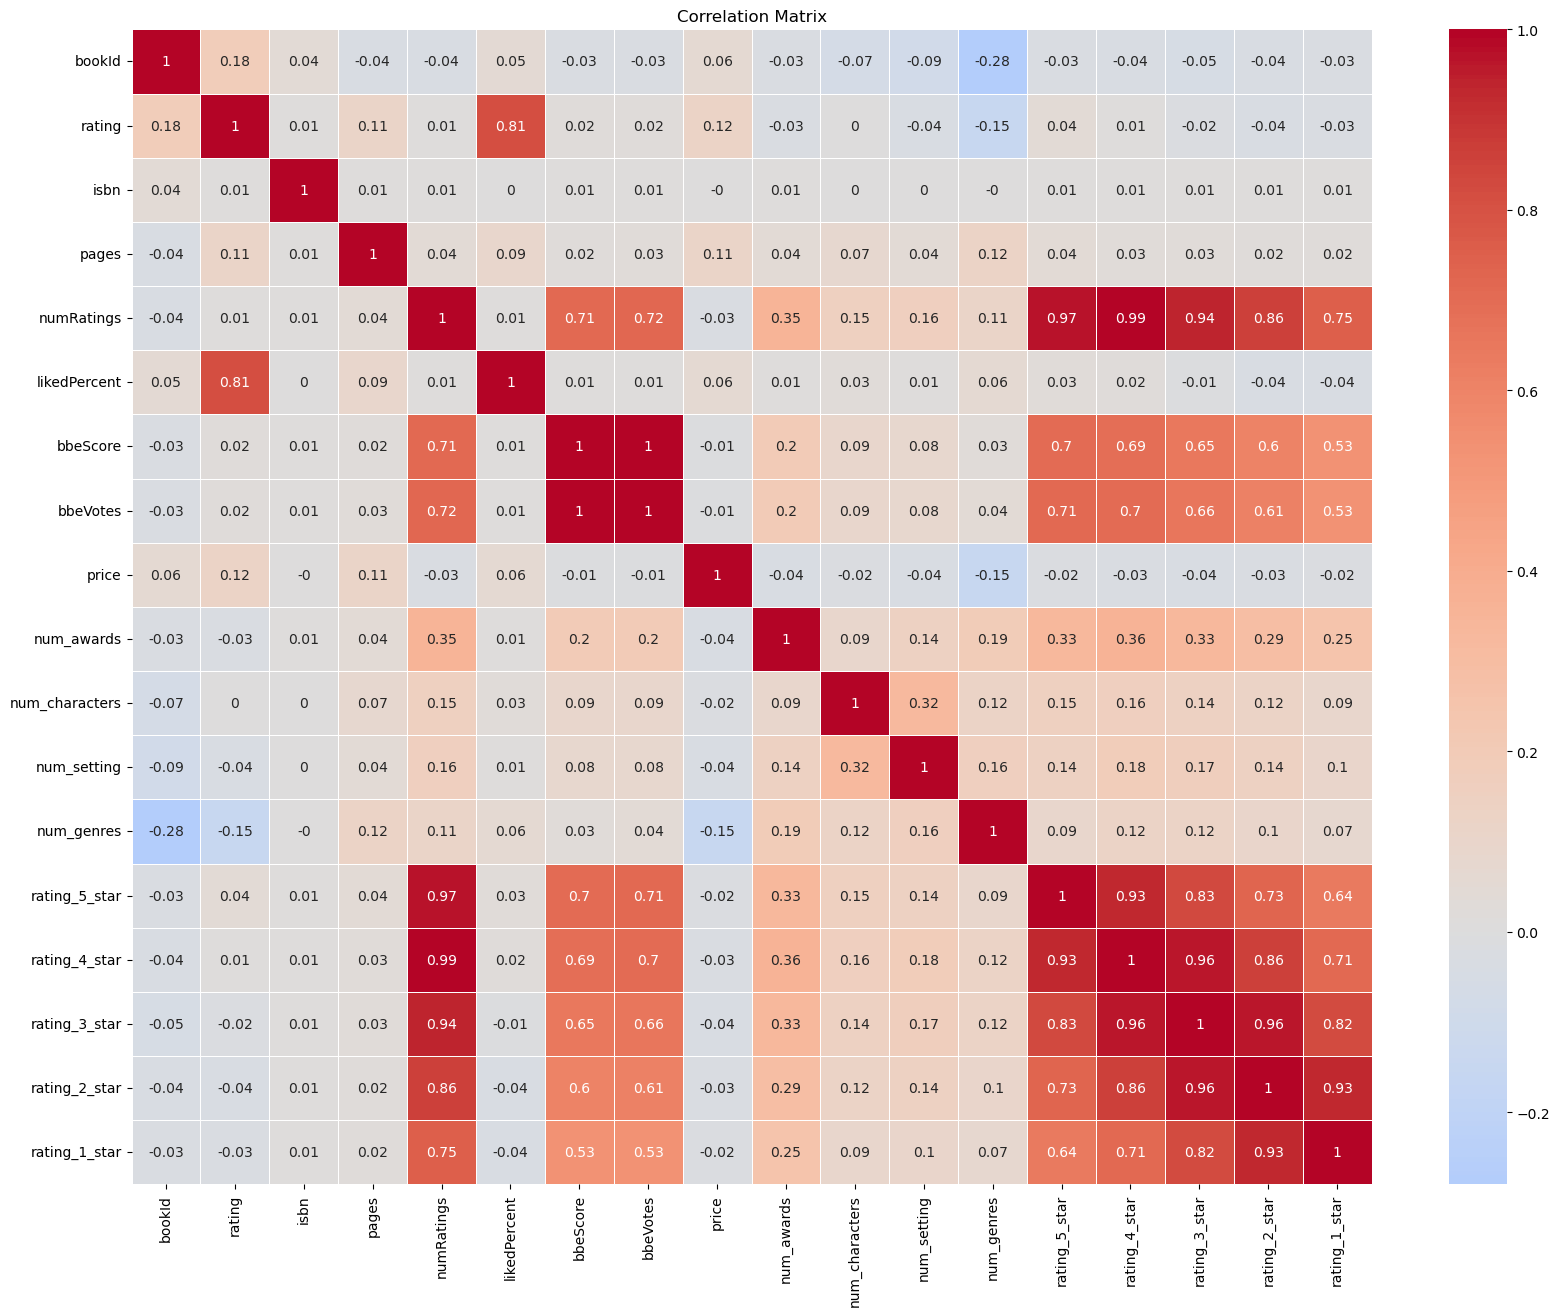

In [121]:
# Compute the correlation matrix and round it to 2 decimal places
corr_matrix = df[numerical_cols].corr().round(2)

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


/var/folders/_t/81hplzs570d_45ldwbxvmx4w0000gp/T/ipykernel_16840/3092599082.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


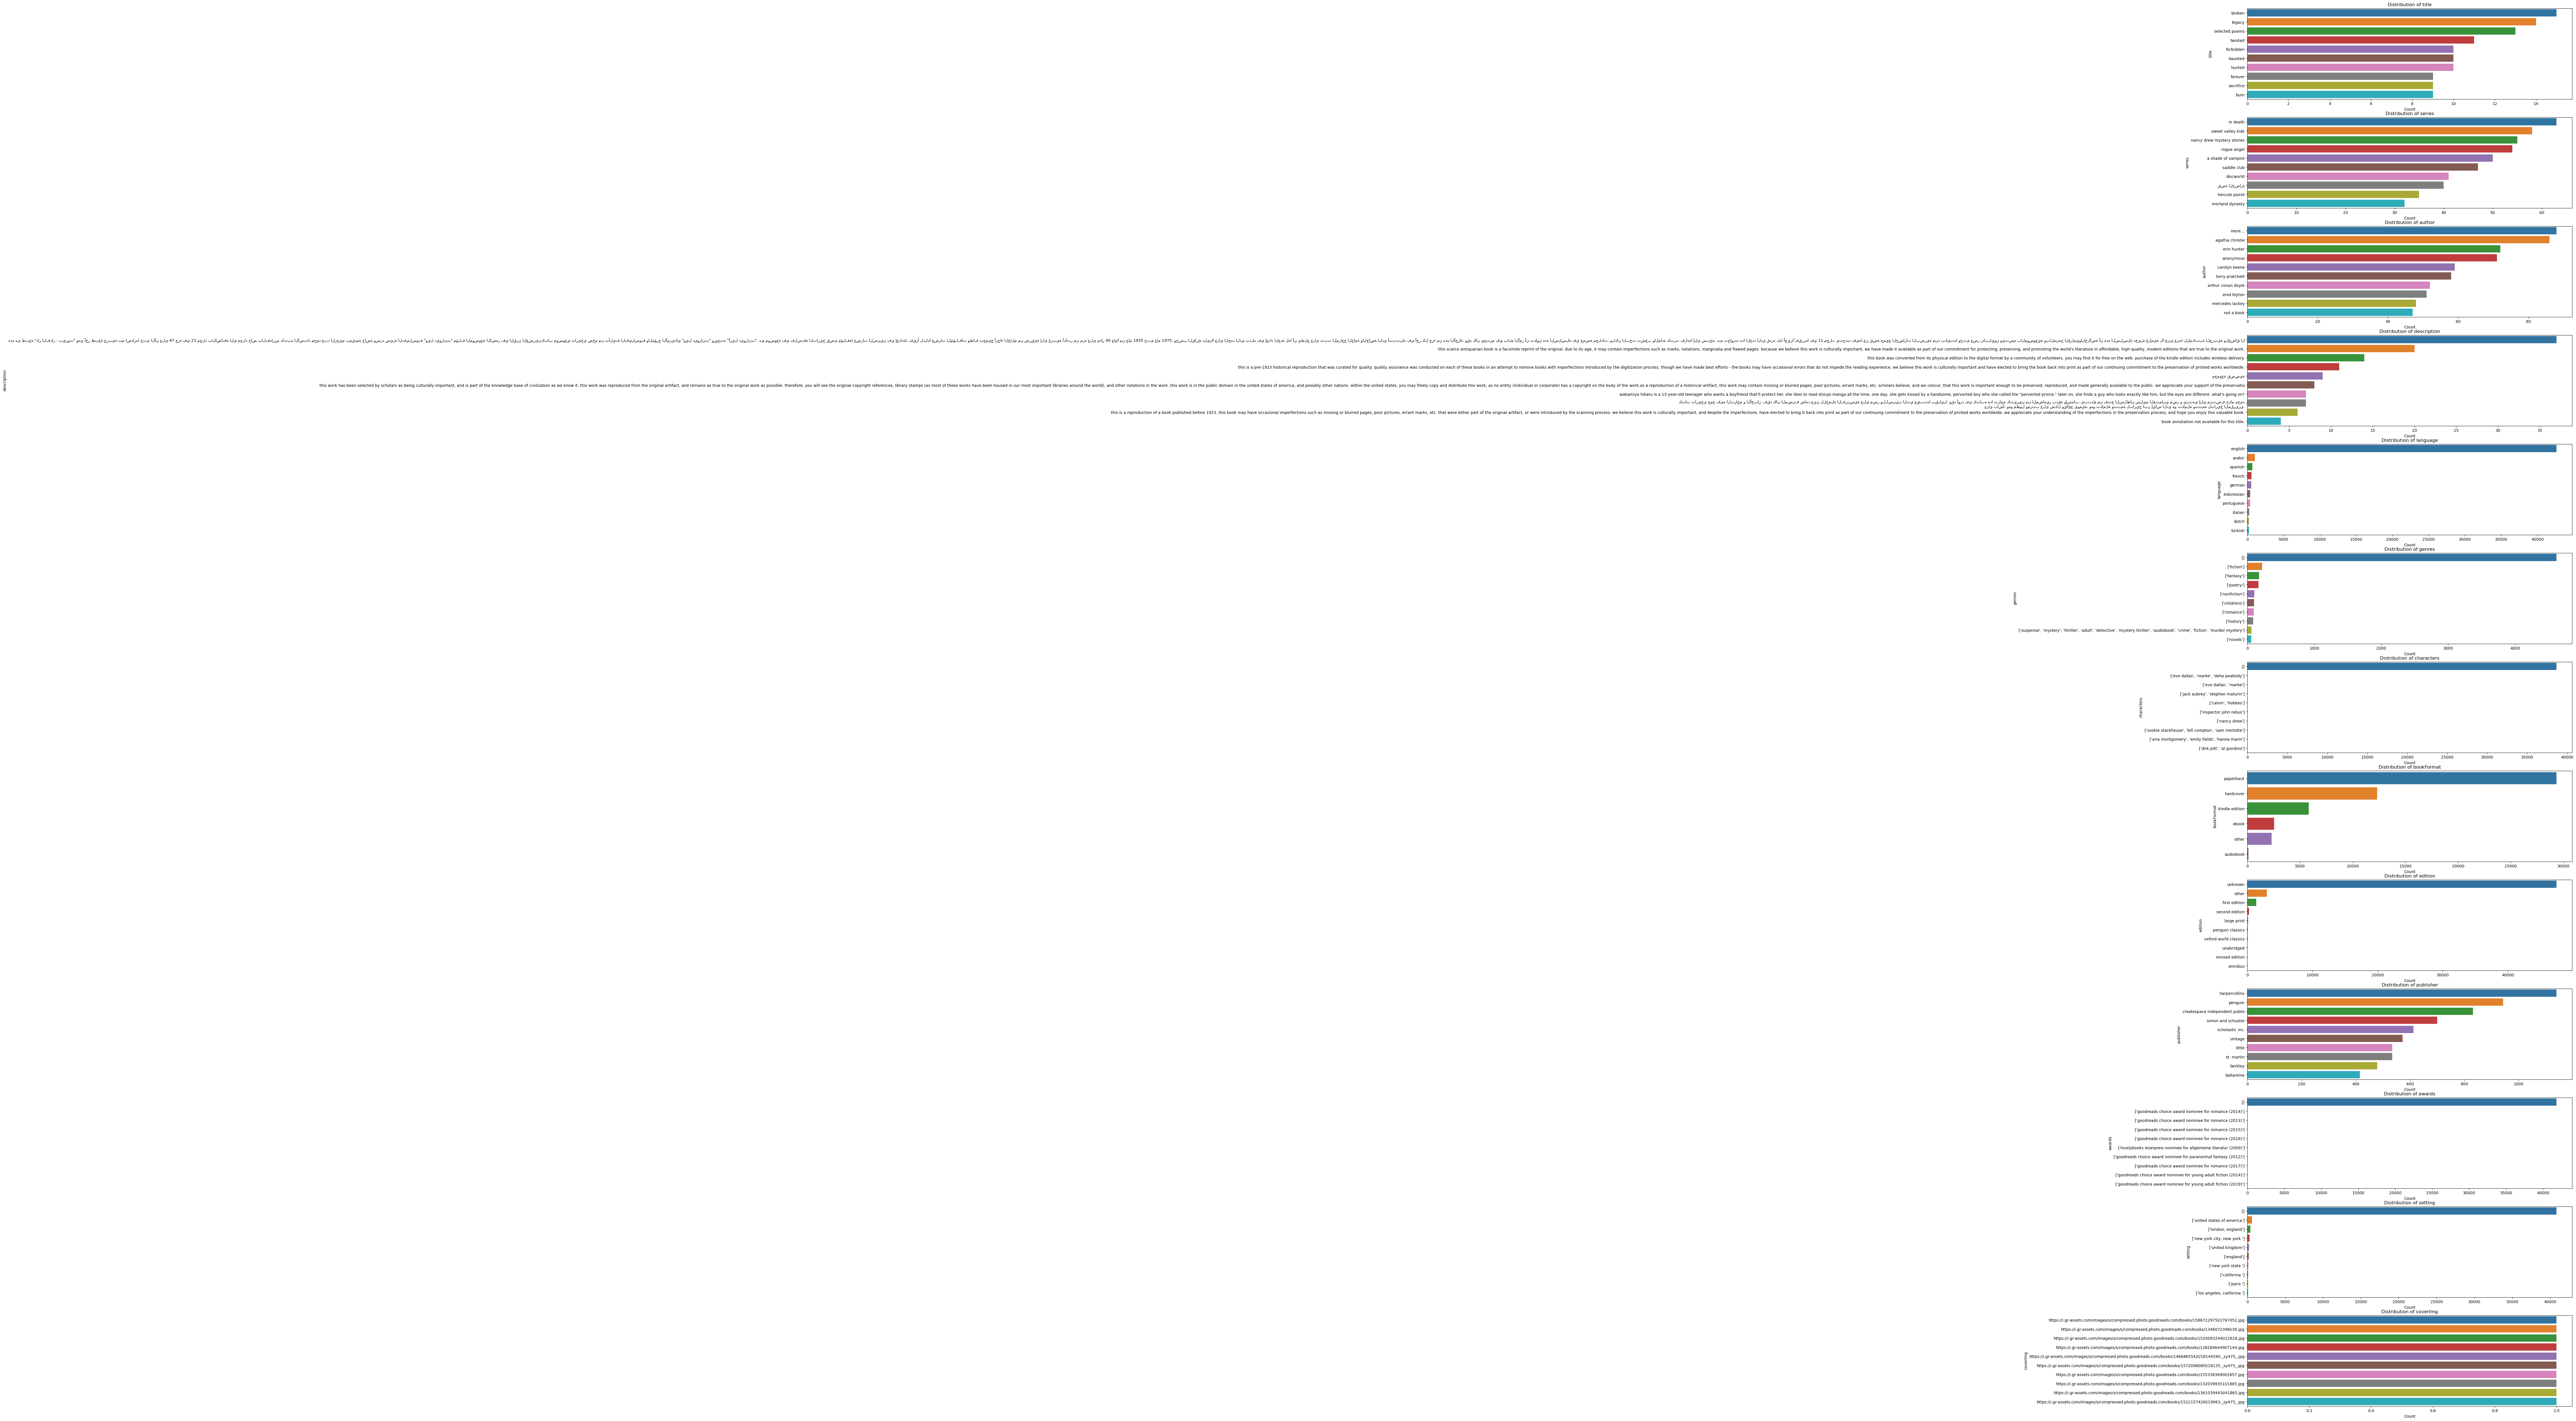

In [122]:
# Distribution of Categorical Columns
# Plotting the distribution of each categorical column
plt.figure(figsize=(15, 5 * len(categorical_cols)))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(data=df, y=col, order=df[col].value_counts().index[:10])  # Displaying top 10 categories for clarity
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


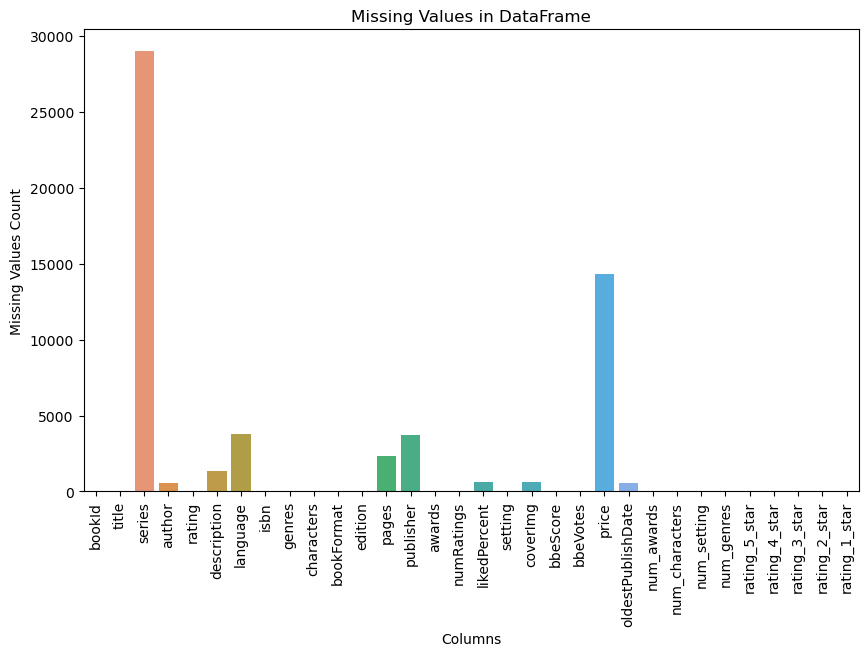

In [55]:
"""Check missing values using sns.barplot to visualize missing values in each column"""
plt.figure(figsize=(10, 6))
sns.barplot(x=df.columns, y=df.isnull().sum())
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

In [27]:
"""Outliers investigation"""
"""Visualizing outliers in numerical columns with boxplots"""
# numerical_columns = df.select_dtypes(include=['float', 'int']).columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

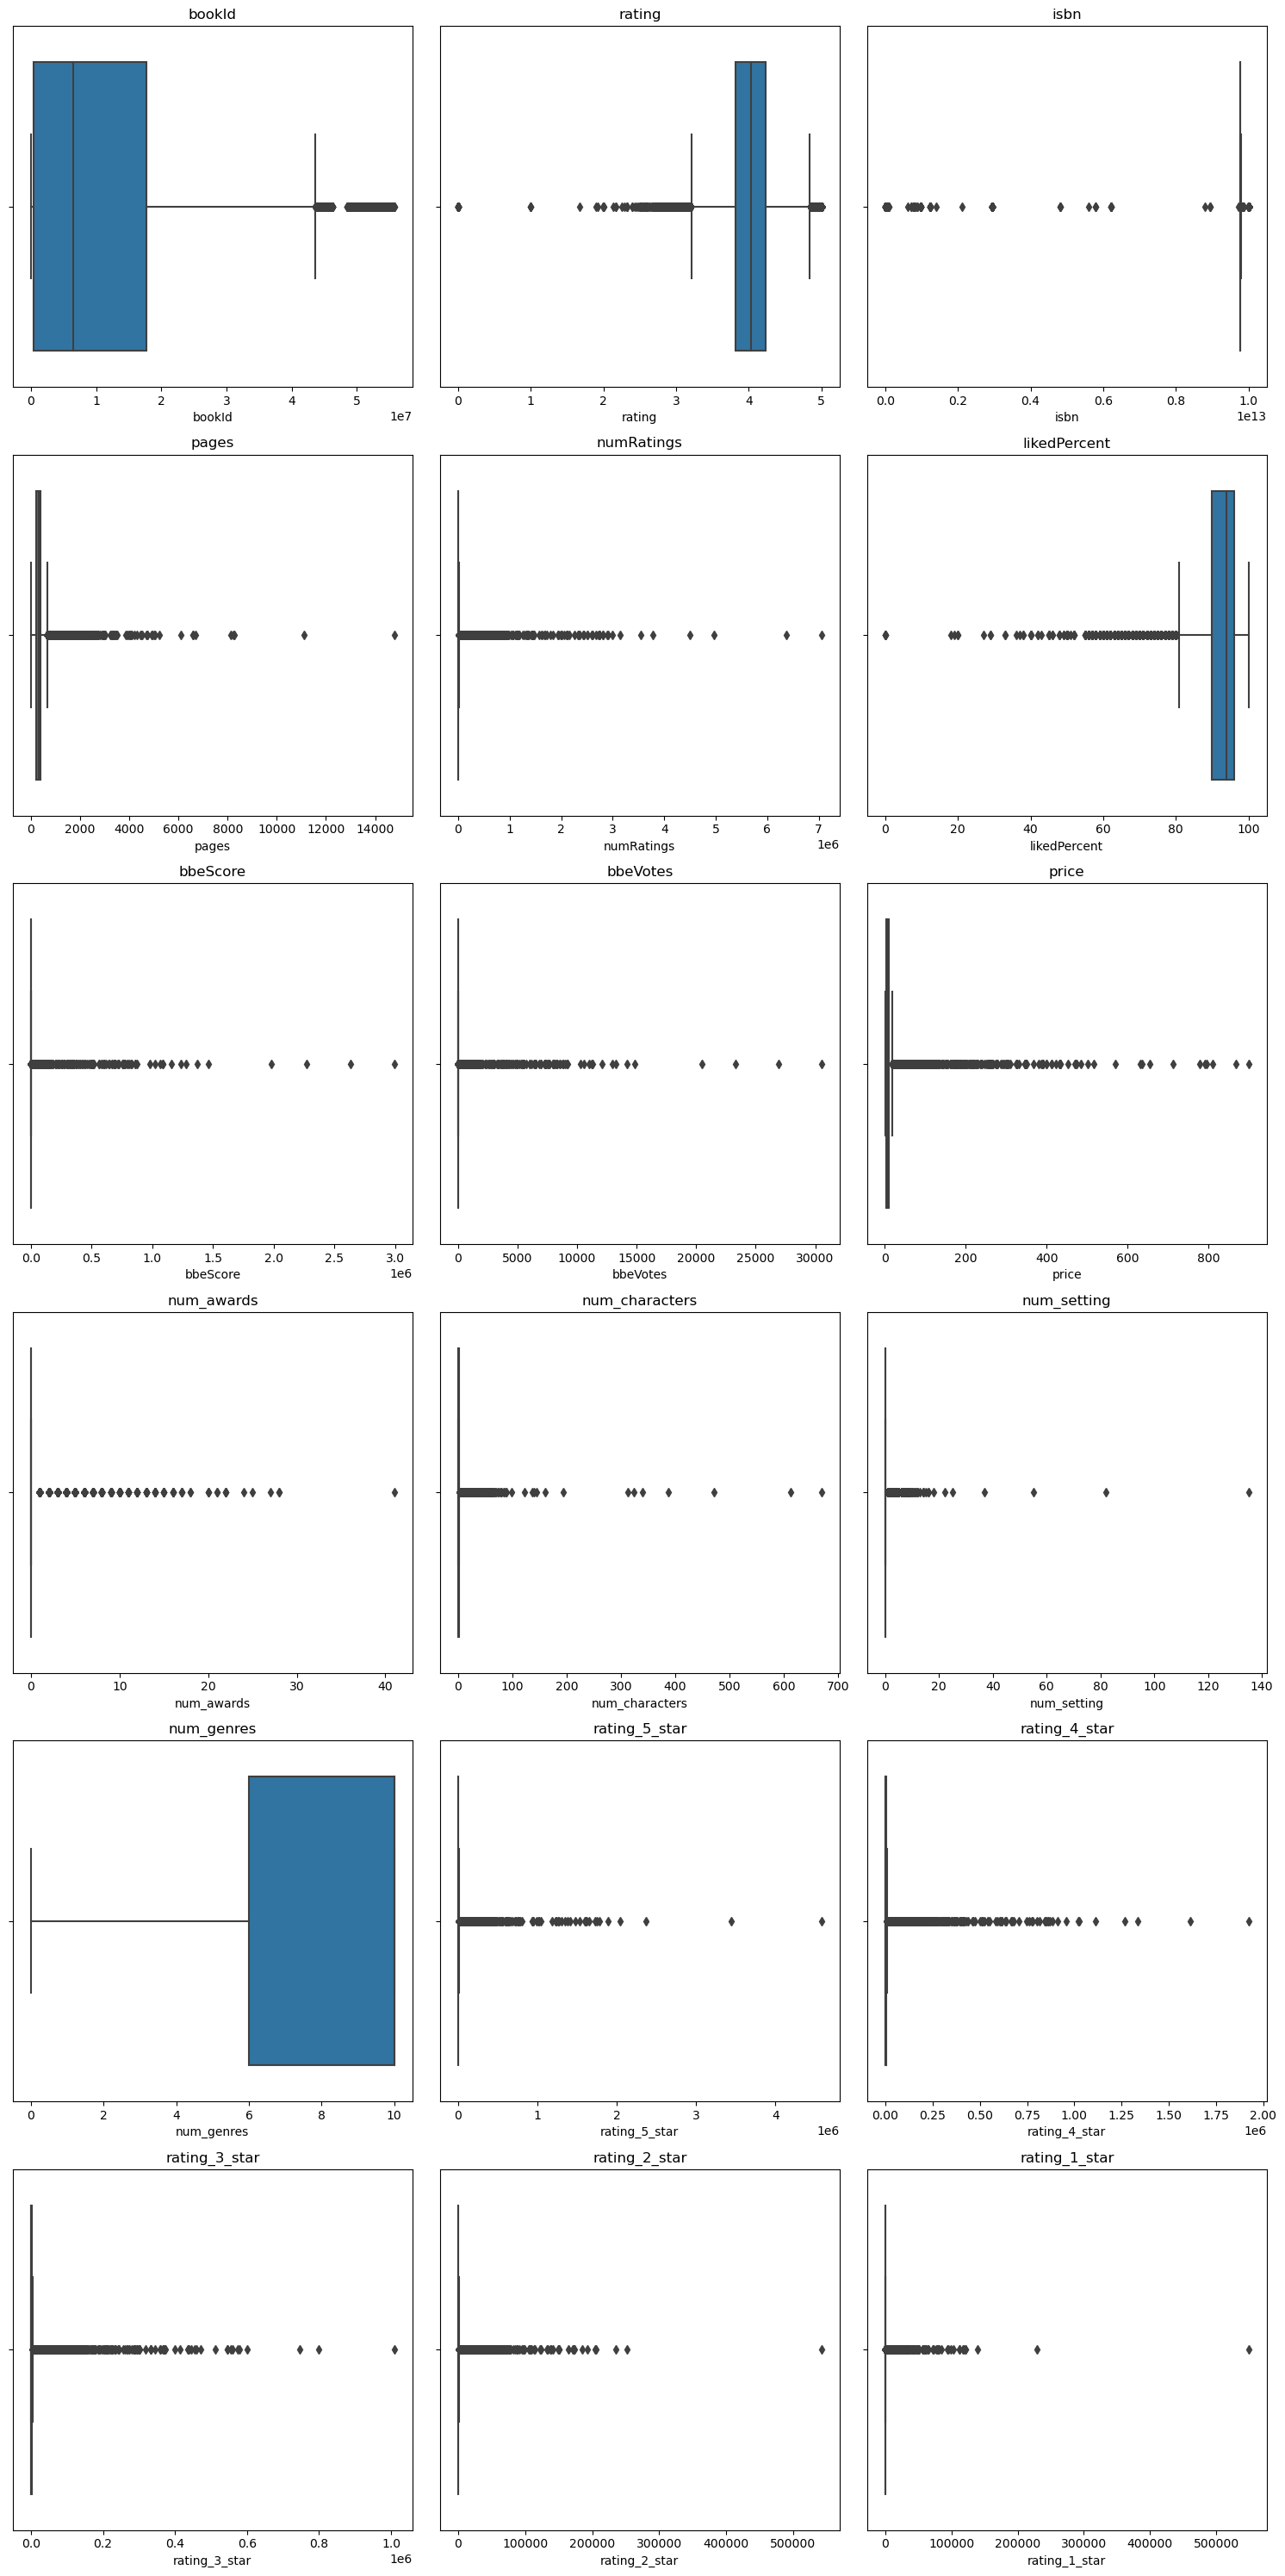

In [75]:
outliers_numerical_cols(df)


In [76]:
# List to store columns with outliers
outliers_columns = []

# Check each numerical column for outliers
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    if outlier_cols(df[col]):
        outliers_columns.append(col)

outliers_columns.remove('bookId')
outliers_columns.remove('isbn')
outliers_columns


['rating',
 'pages',
 'numRatings',
 'likedPercent',
 'bbeScore',
 'bbeVotes',
 'price',
 'num_awards',
 'num_characters',
 'num_setting',
 'rating_5_star',
 'rating_4_star',
 'rating_3_star',
 'rating_2_star',
 'rating_1_star']

In [77]:
# Apply winsorize function to columns with outliers
for col in outliers_columns:
    df = winsorize(df, col)

In [78]:
df[outliers_columns]

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,price,num_awards,num_characters,num_setting,rating_5_star,rating_4_star,rating_3_star,rating_2_star,rating_1_star
0,4.33,374,61427,96.0,1386,18,5.09,2,7,2,23414,21529,11959,3082,1248
1,4.50,640,61427,98.0,1386,18,7.38,2,7,2,23414,21529,11959,3082,1248
2,4.28,324,61427,95.0,1386,18,NaN,2,7,1,23414,21529,11959,3082,1248
3,4.26,279,61427,94.0,1386,18,NaN,0,7,2,23414,21529,11959,3082,1248
4,3.60,501,61427,82.0,1386,18,2.10,2,7,2,23414,21529,11959,3082,1248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52419,4.00,72,871,94.0,38,1,NaN,0,0,0,311,310,197,42,11
52420,4.19,190,37,95.0,38,1,NaN,0,0,0,16,14,5,2,0
52421,3.70,280,6674,84.0,38,1,7.37,1,0,0,2109,1868,1660,647,390
52422,3.85,507,238,90.0,38,1,2.86,0,0,0,77,78,59,19,5


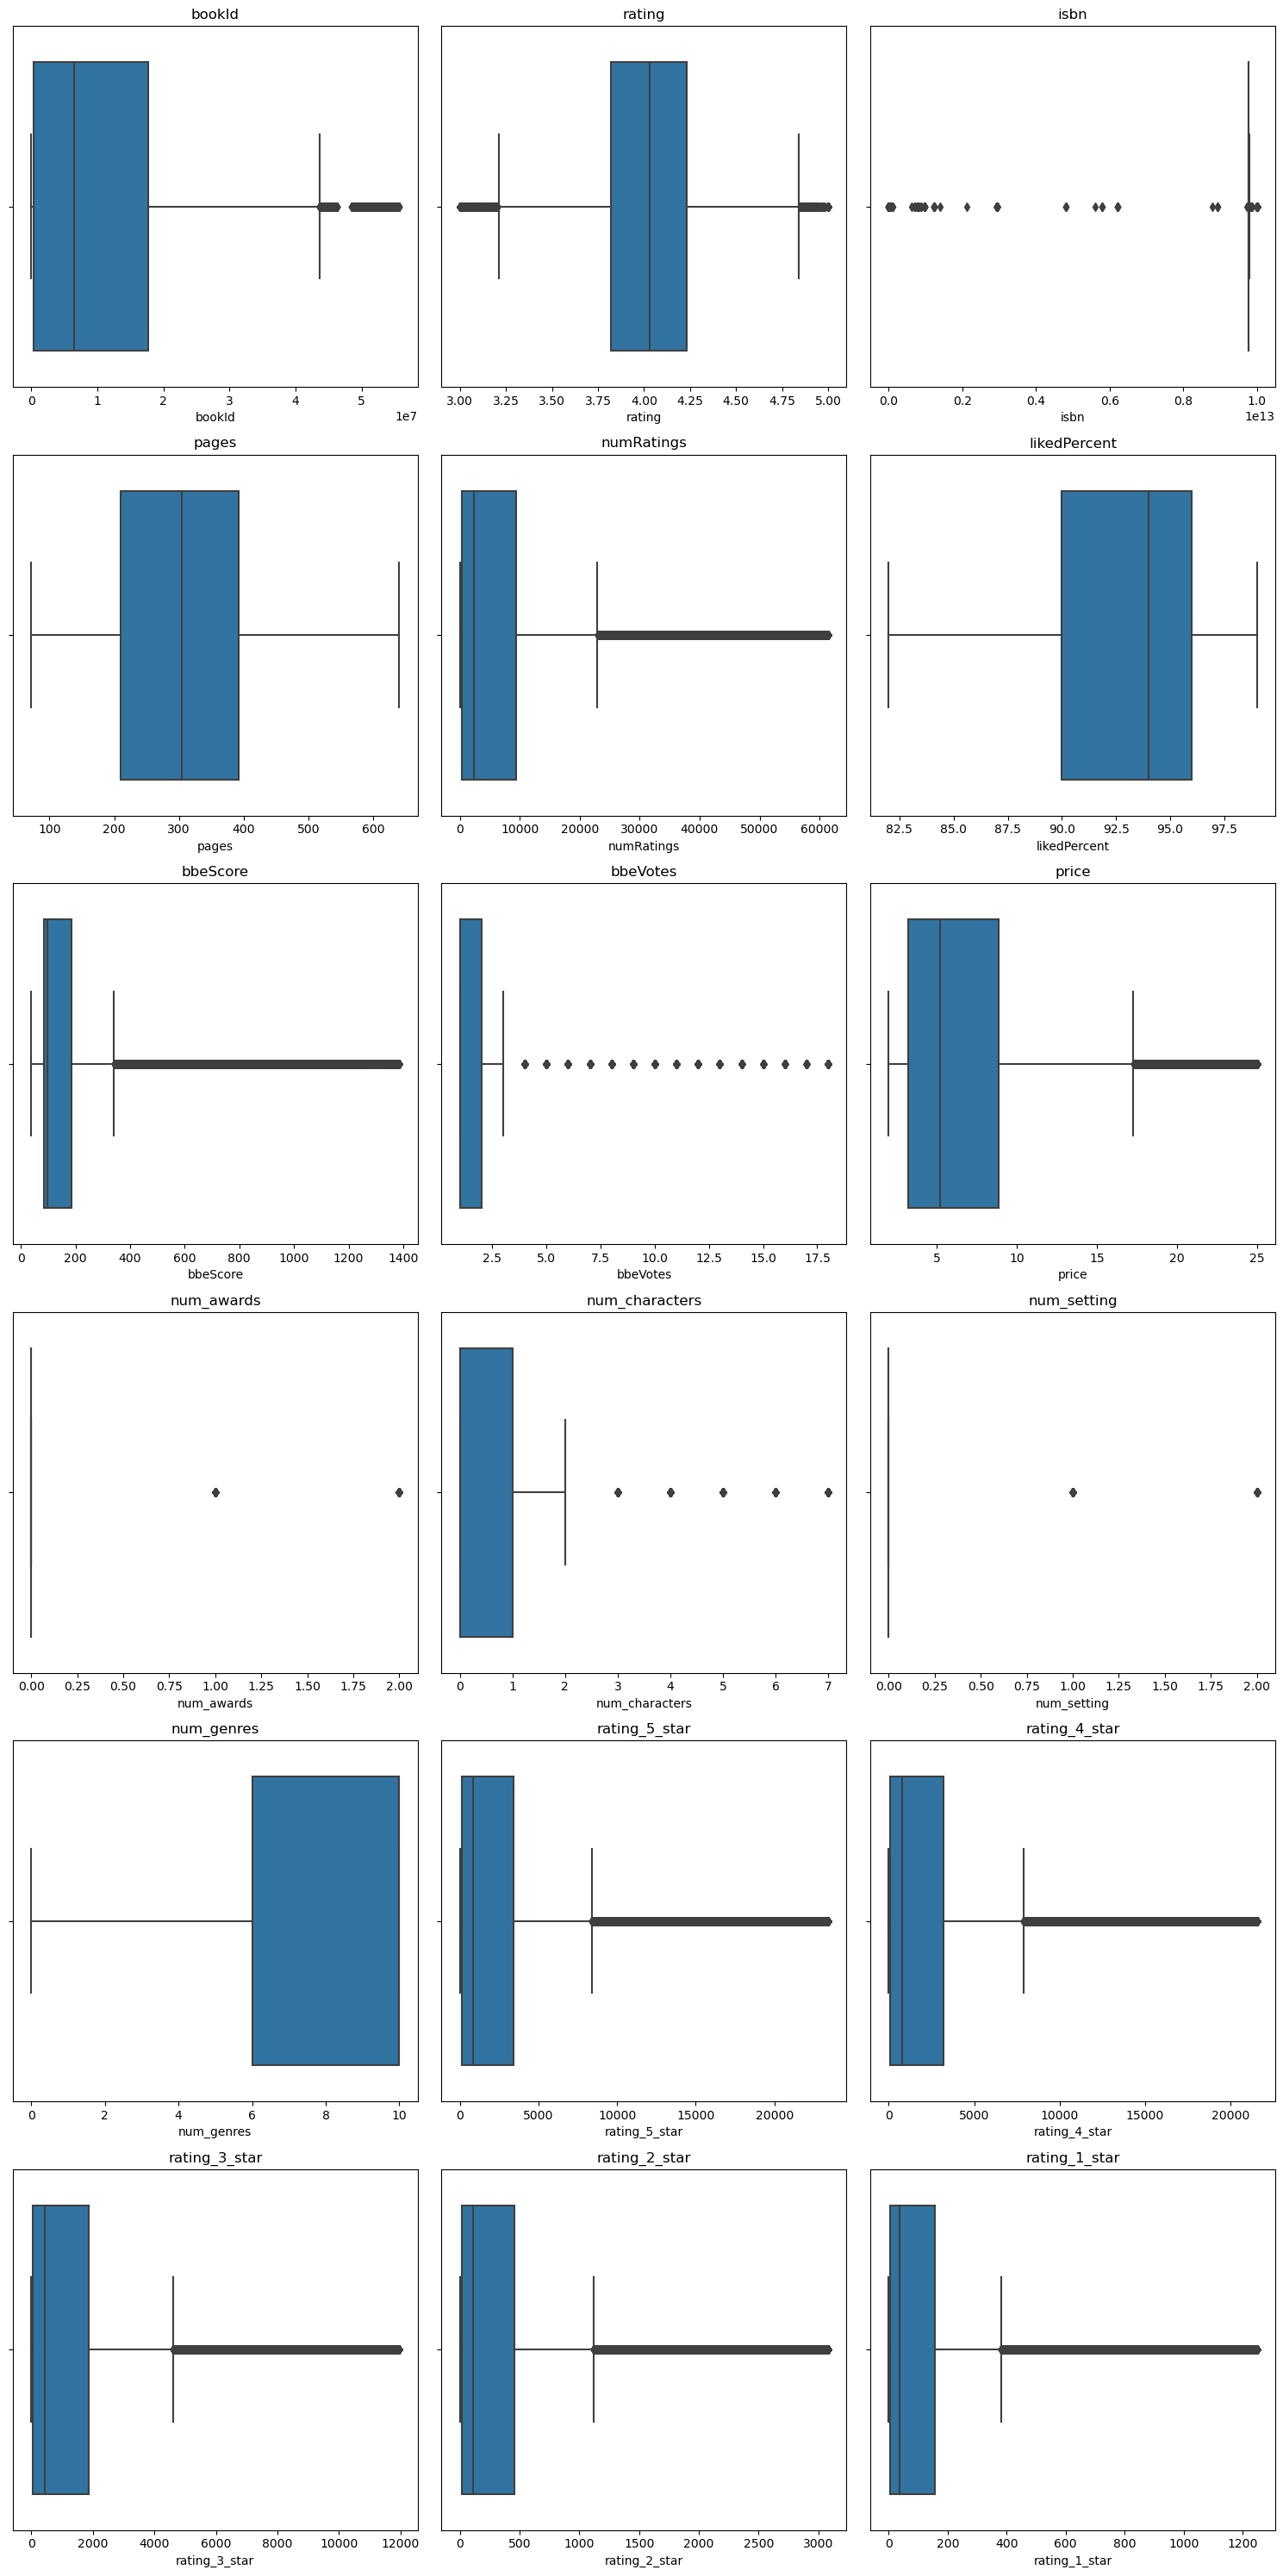

In [80]:
outliers_numerical_cols(df)

/Volumes/Workspace/Anaconda/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Volumes/Workspace/Anaconda/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


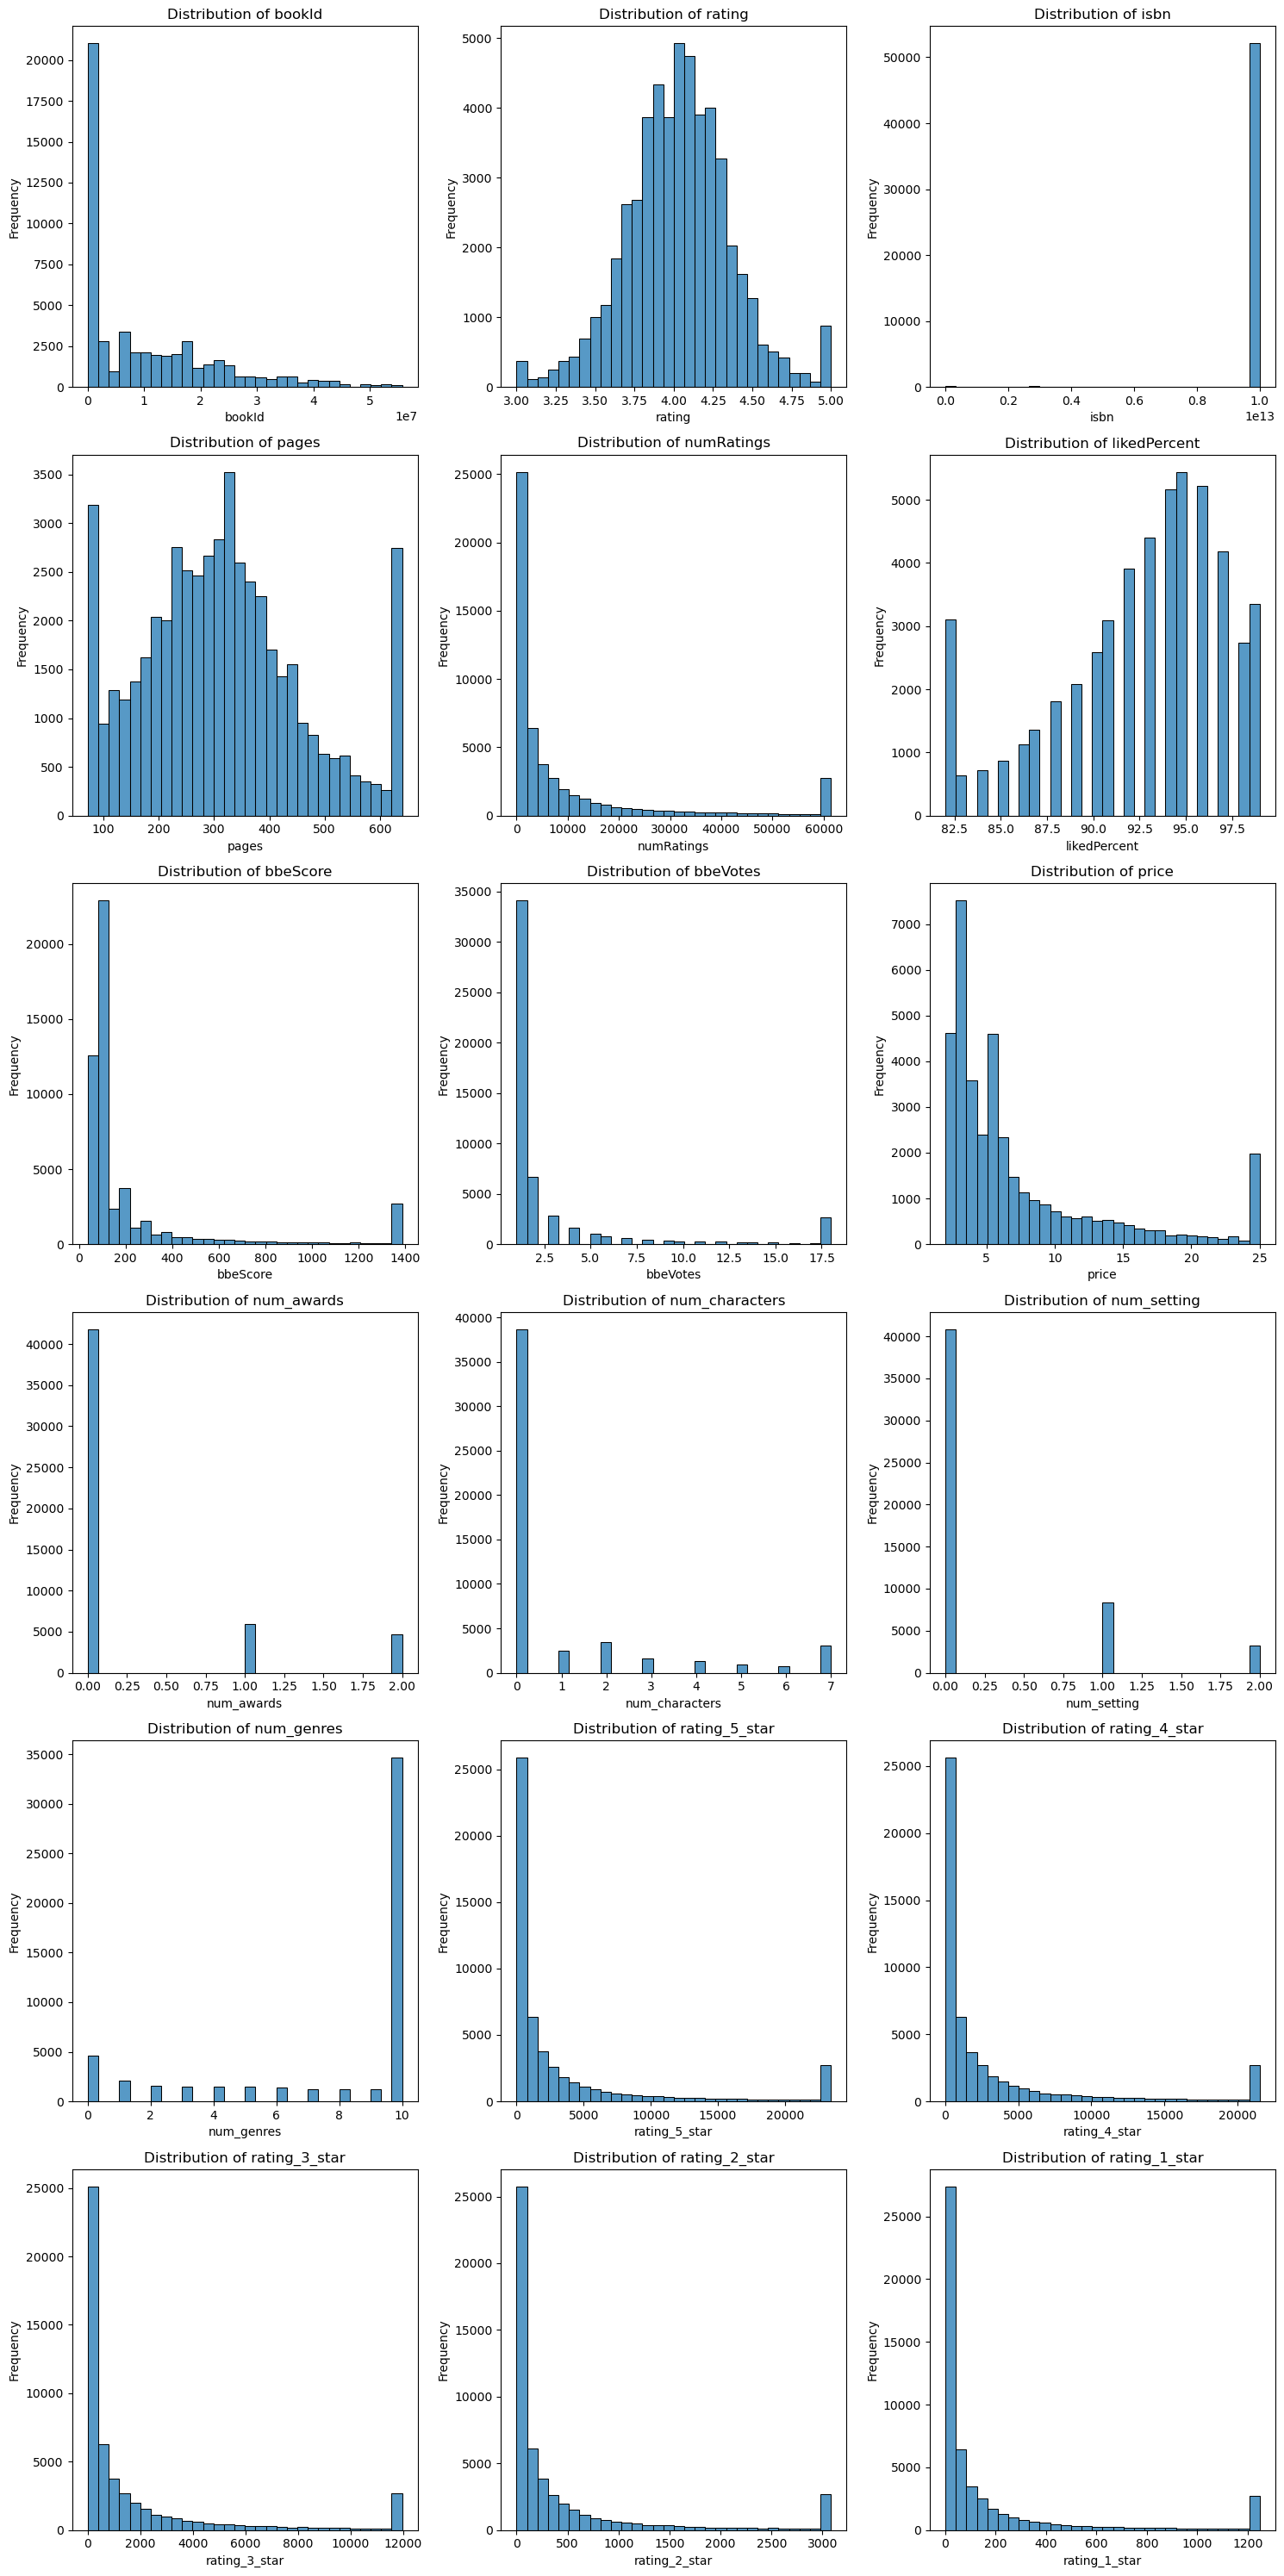

In [87]:
distribution_numerical_cols(df)